In [13]:
# installing the kaggle library
!pip install kaggle

In [14]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
# daatset api
!kaggle competitions download -c cifar-10

100% 715M/715M [00:25<00:00, 32.8MB/s]
100% 715M/715M [00:25<00:00, 30.0MB/s]


In [16]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [17]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [18]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [19]:
!pip install py7zr

In [20]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [21]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [22]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [23]:
filenames = os.listdir('/content/train')
type(filenames)

list

In [24]:
len(filenames)

50000

In [25]:
print(filenames[0:5])
print(filenames[-5:])

['39883.png', '4786.png', '14139.png', '37158.png', '35955.png']
['48837.png', '21952.png', '7812.png', '31644.png', '23617.png']


In [26]:
# lable processing
labels_df=pd.read_csv('/content/trainLabels.csv')

In [27]:
labels_df.shape

(50000, 2)

In [28]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [29]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [30]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [31]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [32]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [33]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [34]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [35]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


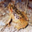

In [36]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

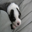

In [37]:
# displaying sample image
import cv2
# because   iamshow function does not work here as it creates a seperate window
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [38]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [39]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [40]:
id_list = list(labels_df['id'])

In [41]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [42]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [43]:
type(data)

list

In [44]:
len(data)

50000

In [45]:
type(data[0])

numpy.ndarray

In [46]:
data[0].shape

(32, 32, 3)

In [47]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [48]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [49]:
type(X)

numpy.ndarray

In [50]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [53]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [54]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [55]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

Building the Neural Network

In [56]:
import tensorflow as tf
from tensorflow import keras # just like tensorflow and pytorch

In [57]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),# we use 64 because it is more efficient for the computer     # relu stands for rectified linear units.It is an activation function.
    keras.layers.Dense(num_of_classes, activation='softmax') # softmax is an activation function. We used softmax as the classes are more than 2 otherwise it would be sigmoid.
])

In [58]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [59]:
# training the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 3ms/step - loss: 2.1829 - acc: 0.1603 - val_loss: 2.1282 - val_acc: 0.1817
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.1087 - acc: 0.1779 - val_loss: 2.1095 - val_acc: 0.1822
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.0913 - acc: 0.1784 - val_loss: 2.0762 - val_acc: 0.1715
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.0802 - acc: 0.1776 - val_loss: 2.0763 - val_acc: 0.1768
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 2.0760 - acc: 0.1820 - val_loss: 2.0633 - val_acc: 0.1813
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.0718 - acc: 0.1843 - val_loss: 2.0579 - val_acc: 0.1910
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 2.0689 - acc: 0.1816 - val_loss: 2.0696 - val_acc: 0.1735
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

In [60]:
# TensorFlow: Open-source machine learning library for building, training, and deploying deep learning models.
from tensorflow.keras import Sequential, models, layers
# Sequential allows for the creation of a linear stack of layers, common in neural networks.
from tensorflow.keras.layers import Dense, Dropout, Flatten
# Dense is a fully connected layer, Dropout is a regularization technique, Flatten is used before Dense in image classification.
from tensorflow.keras.layers import BatchNormalization
# BatchNormalization normalizes inputs for stable training.
from tensorflow.keras.models import load_model
# Load a pre-trained model from a file.
from tensorflow.keras.models import Model
# Model class for creating arbitrary models, offering more flexibility than Sequential.
from tensorflow.keras.applications.resnet50 import ResNet50
# Pre-trained deep learning model for image classification.
from tensorflow.keras import optimizers
# Contains various optimization algorithms used during training.


In [61]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [62]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [63]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [64]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 461s 382ms/step - loss: 2.1064 - acc: 0.2377 - val_loss: 1.7337 - val_acc: 0.3523
Epoch 2/10
1125/1125 [==============================] - 440s 391ms/step - loss: 1.5023 - acc: 0.4496 - val_loss: 1.2877 - val_acc: 0.5483
Epoch 3/10
1125/1125 [==============================] - 440s 391ms/step - loss: 1.2524 - acc: 0.5613 - val_loss: 1.2662 - val_acc: 0.5573
Epoch 4/10
1125/1125 [==============================] - 434s 385ms/step - loss: 1.1005 - acc: 0.6197 - val_loss: 1.4240 - val_acc: 0.5095
Epoch 5/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.9716 - acc: 0.6679 - val_loss: 1.4847 - val_acc: 0.5685
Epoch 6/10
1125/1125 [==============================] - 441s 392ms/step - loss: 0.8842 - acc: 0.7028 - val_loss: 1.4611 - val_acc: 0.5822
Epoch 7/10
1125/1125 [==============================] - 440s 391ms/step - loss: 0.8157 - acc: 0.7292 - val_loss: 0.9325 - val_acc: 0.6833
Epoch 8/10
1125/1125 [============

In [65]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.9561 - acc: 0.6861
Test Accuracy = 0.6861000061035156


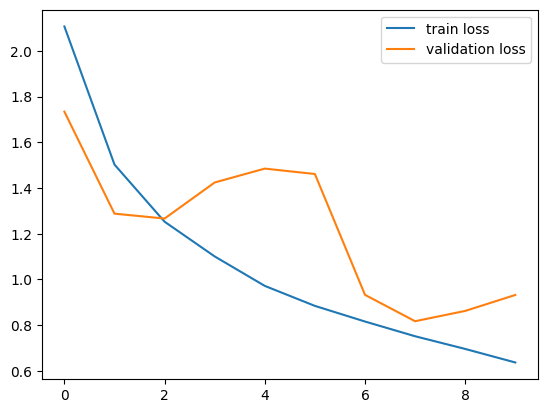

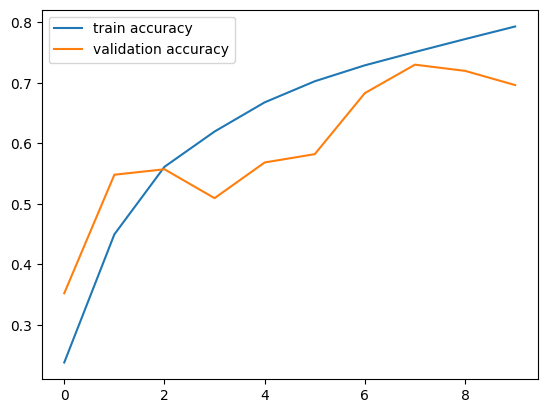

In [66]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()